In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [8]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | port hedland
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | alugan
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | rafsanjan
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | pimenta bueno
Processing Record 14 of Set 1 | vila
Processing Record 15 of Set 1 | mondragone
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | delaware
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | talara
Processing Record 23 of Set 1 | qarayeri
Processing Record 24 of Set 1 | luganville

Processing Record 42 of Set 4 | santa marta
City not found. Skipping...
Processing Record 43 of Set 4 | zalantun
Processing Record 44 of Set 4 | kalmunai
Processing Record 45 of Set 4 | caloundra
Processing Record 46 of Set 4 | muscat
Processing Record 47 of Set 4 | kyzyl
Processing Record 48 of Set 4 | yar-sale
Processing Record 49 of Set 4 | meulaboh
Processing Record 1 of Set 5 | thompson
City not found. Skipping...
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | batagay
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | surt
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | teknaf
Processing Record 9 of Set 5 | chuy
Processing Record 10 of Set 5 | san patricio
Processing Record 11 of Set 5 | naze
Processing Record 12 of Set 5 | tiksi
Processing Record 13 of Set 5 | cairns
Processing Record 14 of Set 5 | piacabucu
Processing Record 15 of Set 5 | guerrero negro
Processing Record 16

Processing Record 27 of Set 8 | ossora
Processing Record 28 of Set 8 | tautira
Processing Record 29 of Set 8 | cabatuan
Processing Record 30 of Set 8 | leeton
Processing Record 31 of Set 8 | gornyy
Processing Record 32 of Set 8 | markova
Processing Record 33 of Set 8 | payakumbuh
Processing Record 34 of Set 8 | tukrah
Processing Record 35 of Set 8 | mercedes
City not found. Skipping...
Processing Record 36 of Set 8 | chapais
Processing Record 37 of Set 8 | malpe
Processing Record 38 of Set 8 | grand river south east
Processing Record 39 of Set 8 | padilla
Processing Record 40 of Set 8 | ribeira brava
Processing Record 41 of Set 8 | seybaplaya
Processing Record 42 of Set 8 | reporoa
Processing Record 43 of Set 8 | gornopravdinsk
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | raudeberg
Processing Record 46 of Set 8 | virbalis
Processing Record 47 of Set 8 | paamiut
Processing Record 48 of Set 8 | stryn
Processing Record 49 of Set 8 | takab
Processing Record 1 of

Processing Record 16 of Set 12 | komsomolets
Processing Record 17 of Set 12 | jiangyou
Processing Record 18 of Set 12 | manokwari
Processing Record 19 of Set 12 | tual
Processing Record 20 of Set 12 | antalaha
City not found. Skipping...
Processing Record 21 of Set 12 | carauari
City not found. Skipping...
Processing Record 22 of Set 12 | tuatapere
Processing Record 23 of Set 12 | amambai
Processing Record 24 of Set 12 | bose
City not found. Skipping...
Processing Record 25 of Set 12 | bourail
Processing Record 26 of Set 12 | yashkul
Processing Record 27 of Set 12 | marovoay
Processing Record 28 of Set 12 | camden
Processing Record 29 of Set 12 | adrar
Processing Record 30 of Set 12 | tshikapa
Processing Record 31 of Set 12 | raton
Processing Record 32 of Set 12 | nuristan
------------------------------
Data Retrieval Complete
------------------------------


In [9]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [10]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,75,NZ,1633829151,40,-46.1927,168.8643,64.47,4.59
1,bluff,58,NZ,1633828853,57,-46.6000,168.3333,64.80,3.24
2,barrow,90,US,1633829152,80,71.2906,-156.7887,30.22,4.61
3,coquimbo,0,CL,1633829153,71,-29.9533,-71.3436,55.13,5.75
4,hasaki,31,JP,1633829153,76,35.7333,140.8333,73.69,6.71


In [11]:
# output to csv
weather_dataframe.to_csv(output_data_file)

In [12]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,75,NZ,1633829151,40,-46.1927,168.8643,64.47,4.59
1,bluff,58,NZ,1633828853,57,-46.6000,168.3333,64.80,3.24
2,barrow,90,US,1633829152,80,71.2906,-156.7887,30.22,4.61
3,coquimbo,0,CL,1633829153,71,-29.9533,-71.3436,55.13,5.75
4,hasaki,31,JP,1633829153,76,35.7333,140.8333,73.69,6.71


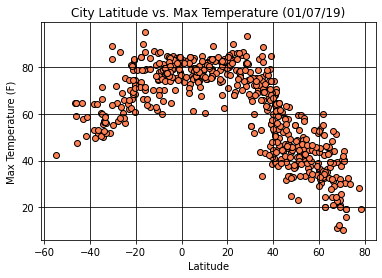

In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="coral")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("Figures/fig1.png")
plt.show()

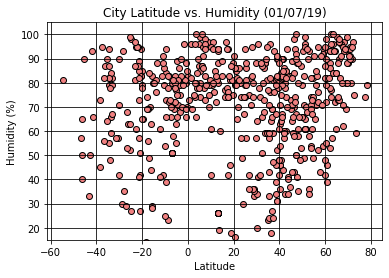

In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="lightcoral")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("Figures/fig2.png")
plt.show()

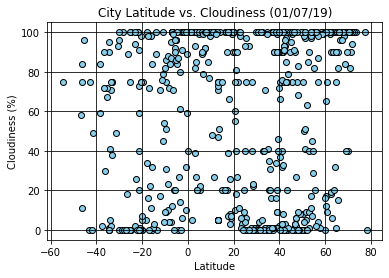

In [31]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("Figures/fig3.png")
plt.show()

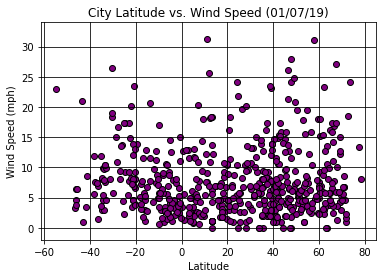

In [35]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("Figures/fig4.png")
plt.show()